<a href="https://colab.research.google.com/github/rrizkiramadhan08/RizkiRamadhanTask/blob/main/Week07/week7Worksheet_of_7_XGBoost_tugasxgboost2_Rizki_Ramadhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learn on how to build and optimize model with **gradient boosting.**

#Introduction
By definition, **ensemble methods** combine the predictions of several models (e.g., several trees, in the case of random forest).

Now, we'll learn about another ensemble method called gradient boosting.

#Difference of Decision Tree, Random Forest, and XGBoost

1. Decision Tree:
A decision tree is a simple and interpretable model that recursively splits the data into subsets based on the feature values. It forms a tree-like structure where each internal node represents a test on a feature, each branch represents the outcome of that test, and each leaf node represents the final prediction. The decision tree makes binary decisions at each node to split the data. It is prone to overfitting, especially when the tree becomes deep, capturing noise and leading to poor generalization on unseen data.

2. Random Forest:
Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions through voting (for classification) or averaging (for regression). Each decision tree is trained on a random subset of the data (bootstrap sample) and a random subset of the features. This randomness reduces overfitting and increases the model's ability to generalize to new data.

3. XGBoost (Extreme Gradient Boosting):
XGBoost is an optimized implementation of the Gradient Boosting algorithm. It creates an ensemble of weak learners (usually shallow decision trees) sequentially, where each new model corrects the errors made by the previous one. XGBoost uses a gradient-based optimization algorithm to minimize a loss function while adding new trees to the ensemble. It also includes regularization terms to control overfitting and speed up the training process. XGBoost is known for its high performance, scalability, and efficiency, making it popular in various machine learning competitions and real-world applications.
**XGBoost** is an implementation of gradient boosting with several additional features focused on perfmance and speed. The final result of an XGBoost model is a weighted sum of the predictions made by all the individual trees in the sequence. The contribution of each tree is adjusted during training based on how well it reduces the overall error.


Note:

* Regularization (penyederhanaan): XGBoost introduces regularization terms to control overfitting during the training process. Regularization helps prevent the model from becoming too complex and ensures better generalization to unseen data.


#Gradient Boosting

**Gradient boosting** is a method that goes through cycles to iteratively add models into an ensemble (setelan).

It begins by initializing the ensemble with a single model, whose predictions can be pretty naive. (Even if its predictions are wildly inaccurate, subsequent (kemudian) additions to the ensemble will address those errors.)

Then, we start the cycle:
1. First, we use the current ensemble to generate predictions for each observation in the dataset. To make a prediction, we **add the predictions from all models** in the ensemble.
2. These predictions are used to calculate a loss function (like mean squared error, for instance).
3. Then, we use the loss function to fit a new model that will be added to the ensemble. Specifically, we determine model parameters so that adding this new model to the ensemble will reduce the loss.
4. Finally, we add the new model to ensemble, and ...
5. Repeat!

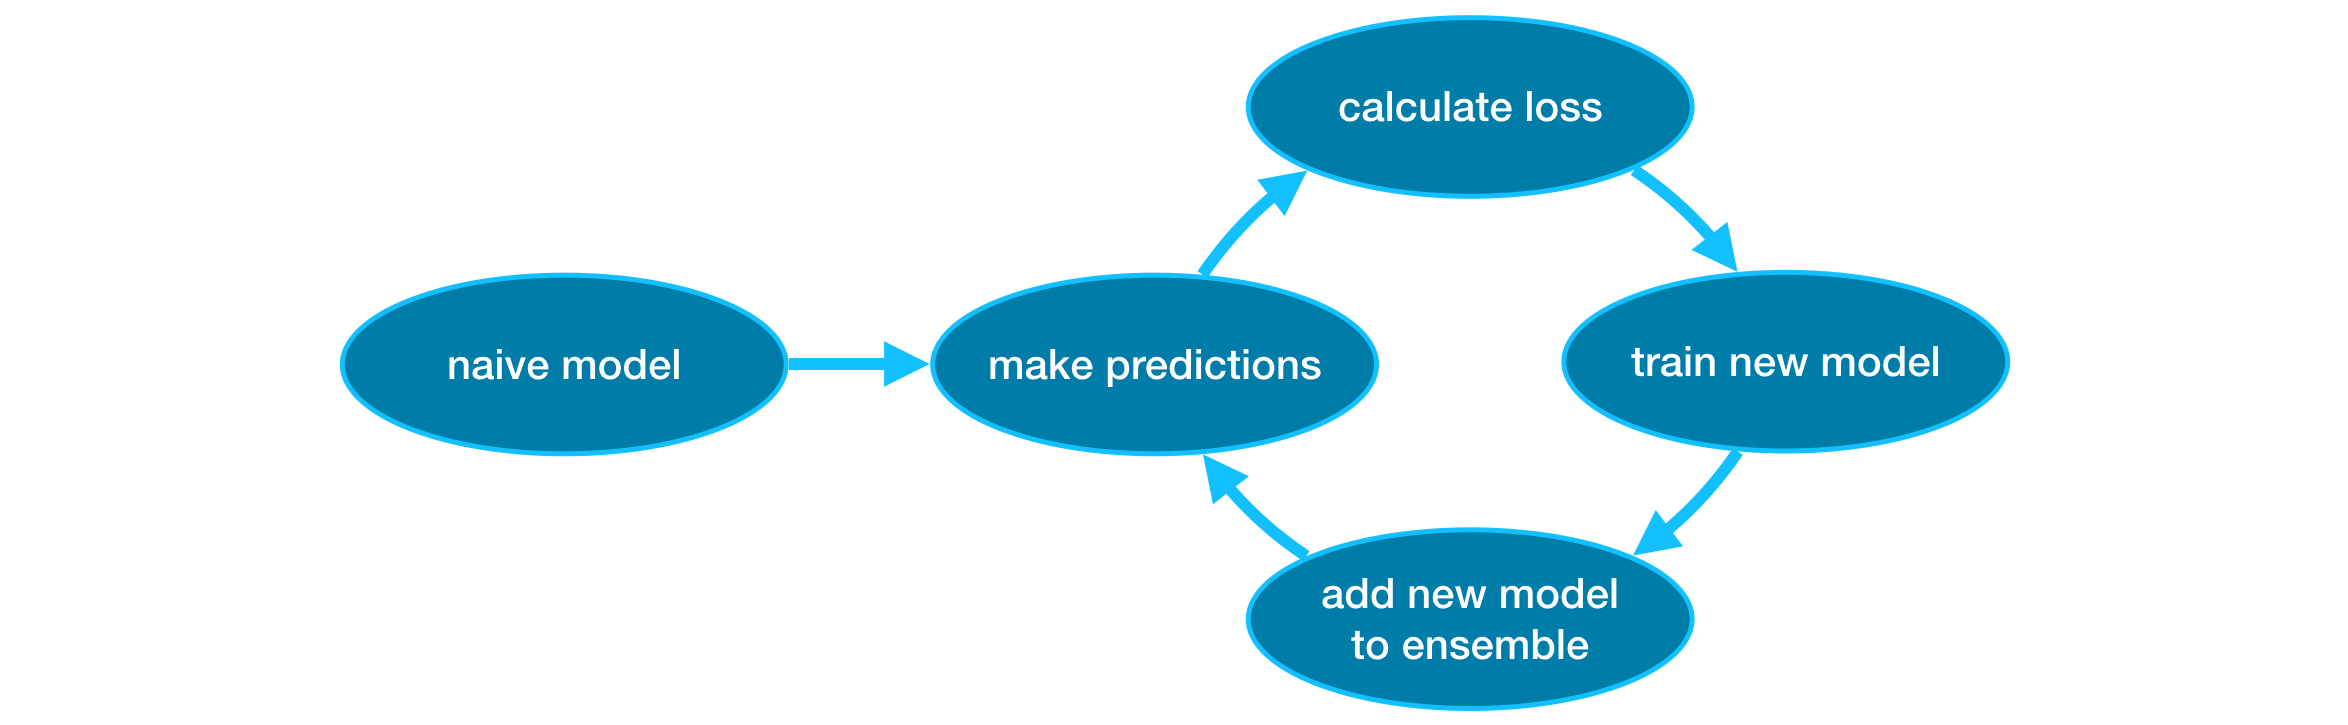

#Example
We begin by loading the training and validation data in X_train, X_valid, y_train, y_valid.

**Prompt:**

Write a code cell to mount Google Drive in Colab.

In [6]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Mengimpor library pandas
import pandas as pd




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Membaca file CSV dari Google Drive
file_path = '/content/drive/MyDrive/DATA SET/tugasxgboost2.csv'

**Prompt:**

Write a code cell to read a CSV file from Google Drive into a DataFrame.

In [8]:
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataset
df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


**Prompt:**

Write a code cell to select a subset of predictors ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt'] and set the target variable ['Price'] from the DataFrame.

In [9]:
# Membaca file CSV dari Google Drive dengan separator titik koma
file_path = '/content/drive/MyDrive/DATA SET/tugasxgboost2.csv'
df = pd.read_csv(file_path, sep=';', quoting=1)  # Menggunakan sep=';' untuk pemisahan yang benar

# Menampilkan beberapa baris pertama dari dataset
print("Beberapa baris pertama dari dataset:")
print(df.head())

# Menampilkan nama kolom yang ada di DataFrame untuk verifikasi
print("Nama kolom sebelum pembersihan:", df.columns.tolist())

# Memperbaiki nama kolom dengan menghapus tanda kutip dan spasi
df.columns = df.columns.str.replace('"', '').str.strip()

# Menampilkan nama kolom setelah pembersihan
print("Nama kolom setelah pembersihan:", df.columns.tolist())

# Menetapkan kolom fitur dan target
predictors = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
              'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
              'pH', 'sulphates', 'alcohol']  # Semua kolom kecuali 'quality'
target = 'quality'  # Kolom target

# Memisahkan fitur (X) dan target (y)
X = df[predictors]
y = df[target]

# Menampilkan beberapa baris dari X dan y untuk verifikasi
print("Fitur (X):")
print(X.head())
print("Target (y):")
print(y.head())

Beberapa baris pertama dari dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1    

**Prompt:**

Write a code cell to split the data into training and validation

In [10]:

# Memisahkan fitur (X) dan target (y)
X = df[predictors]
y = df[target]

# Membagi data menjadi set pelatihan dan set validasi
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)


In the next code cell, we import the scikit-learn API for XGBoost (`xgboost.XGBRegressor`). As you'll see in the output, the `XGBRegressor` class has many tunable parameters.


**Prompt:**

Write a code cell to train the model using XGBoost, and print the mean absolute error on the validation set.

In [11]:
# Mengimpor library yang diperlukan
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Melatih model XGBoost
model = XGBRegressor()
model.fit(X_train, y_train)  # Melatih model dengan data pelatihan

# Membuat prediksi pada data validasi
predictions = model.predict(X_val)

# Menghitung Mean Absolute Error pada set validasi
mae = mean_absolute_error(y_val, predictions)
print(f"Mean Absolute Error pada set validasi: {mae:.4f}")  # Menampilkan hasil MAE


Mean Absolute Error pada set validasi: 0.5088


We also make predictions and evaluate the model.

#Parameter Tuning
XGBoost has a few parameters that can dramatically affect accuracy and training speed. The first parameters you should understand are:

`n_estimators`
Specifies how many times to go through the modeling cycle described above. It is equal to the number of models that we include in the ensemble.
* Too low a value causes underfitting, which leads to inaccurate predictions on both training data and test data.
* Too high a value causes overfitting, which causes accurate predictions on training data, but inaccurate predictions on test data (which is what we care about).

Typical values range from 100-1000, though this depends a lot on the `learning_rate` parameter discussed below.

Here is the code to set the number of models in the ensemble:

**Prompt:**

Write a code cell to create another XGBRegressor with 500 estimators, train it, and print the mean absolute error on the validation set.

In [12]:
# Mengimpor library yang diperlukan
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Membuat model XGBoost dengan 500 estimators
model_500 = XGBRegressor(n_estimators=500)  # Mengatur jumlah estimators

# Melatih model dengan data pelatihan
model_500.fit(X_train, y_train)

# Membuat prediksi pada data validasi
predictions_500 = model_500.predict(X_val)

# Menghitung Mean Absolute Error pada set validasi
mae_500 = mean_absolute_error(y_val, predictions_500)
print(f"Mean Absolute Error pada set validasi dengan 500 estimators: {mae_500:.4f}")  # Menampilkan hasil MAE


Mean Absolute Error pada set validasi dengan 500 estimators: 0.4722


The MAE result of the model with n_estimators set to 500 turned out to be greater than the default value of n_estimators, which is 100.

The MAE (Mean Absolute Error) of the model with an n_estimators value of 110 turns out to be smaller than the default n_estimators value of 100, as well as n_estimators with a value of 500.

`early_stopping_rounds`
offers a way to automatically find the ideal value for `n_estimators`. Early stopping causes the model to stop iterating when the validation score stop improving, even if we aren't the hard stop for `n_estimators`. It's smart to set a high value for `n_estimators` and then use `early_stopping_rounds` to find the optimal time to stop iterating.

Since random chance sometimes causes a single round where validation scores don't improve, you need to specify a number for how many rounds of straight deterioration (keburukan) to allow before stopping. Setting `early_stopping_rounds=5` is a reasonable choice. In this case, we stop after 5 straight rounds of deteriorating validation scores.

When using `early_stopping_rounds`, you also need to set aside some data for calculating the validation scores. This is done by setting the `eval_set` parameter.

We can modify the example above to include early stopping.

---
Note:

* In the context of training machine learning models, "deteriorating" refers to a situation where the performance of the model on a validation dataset worsens over consecutive iterations during the training process. Typically, we monitor a metric (such as accuracy, mean squared error, etc.) on the validation dataset to evaluate the model's performance.

* In the given code, verbose=False is an argument passed to the fit method of the XGBRegressor model. Setting verbose to False means that during the training process, the model will not produce any output or progress messages. It will train silently without displaying information about each boosting round.

`n_jobs`

On larger datasets where runtime is a consideration, you can use parallelism to build your model faster. It's common to set the parameter `n_jobs` equal to the number of cores on your machine. On smaller datasets, this won't help.
The resulting model won't be any better, so micro-optimizing for fitting time is typically nothing but a distraction. But, it's useful in large datasets where you would otherwise spend a long time waiting during the `fit` command.

Here's the modified example.

**Prompt:**

Write a code cell to train an XGBRegressor with a custom learning rate, 90 estimators, and early stopping rounds, and print the mean absolute error on the validation set.

In [13]:
# Mengimpor library yang diperlukan
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Menginisialisasi model XGBoost dengan custom learning rate dan 90 estimators
model_custom = XGBRegressor(n_estimators=90, learning_rate=0.1)

# Melatih model dengan data pelatihan
model_custom.fit(X_train, y_train)

# Membuat prediksi pada data validasi
predictions_custom = model_custom.predict(X_val)

# Menghitung Mean Absolute Error pada set validasi
mae_custom = mean_absolute_error(y_val, predictions_custom)
print(f"Mean Absolute Error pada set validasi dengan custom settings: {mae_custom:.4f}")  # Menampilkan hasil MAE


Mean Absolute Error pada set validasi dengan custom settings: 0.5425


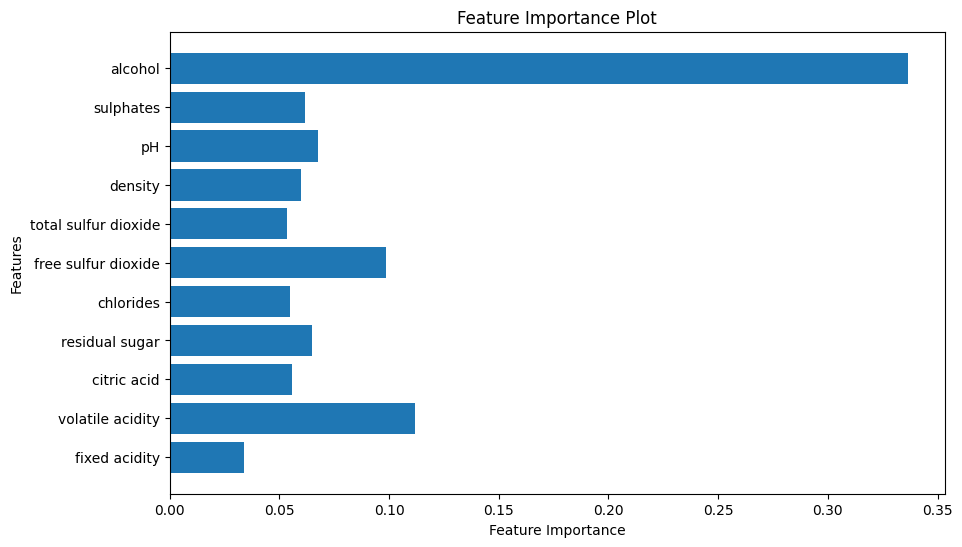

In [14]:
import matplotlib.pyplot as plt

# Membuat plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(predictors, model.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")
plt.show()


Fitur 'alcohol' memiliki kontribusi paling besar dalam model, menunjukkan bahwa variabel ini sangat berpengaruh terhadap prediksi kualitas. Peningkatan kadar alkohol dalam sampel anggur kemungkinan besar berhubungan dengan kualitas yang lebih tinggi.

Fitur 'sulphates' dan 'pH' juga menunjukkan pentingnya yang signifikan, meskipun tidak sebesar 'alcohol'. Ini menunjukkan bahwa kedua faktor ini juga berperan dalam menentukan kualitas anggur.

Fitur seperti 'density' dan 'total sulfur dioxide' menunjukkan kontribusi yang sedang. Hal ini menunjukkan bahwa variabel-variabel ini memberikan pengaruh yang lebih kecil tetapi tetap penting dalam memprediksi kualitas.

Fitur yang memiliki kontribusi paling rendah termasuk 'fixed acidity' dan 'volatile acidity'. Meskipun tetap berkontribusi pada model, pengaruhnya terhadap prediksi kualitas tidak sebesar fitur lainnya.

Kesimpulan:
Grafik ini memberikan wawasan yang berharga tentang fitur mana yang harus diperhatikan dalam analisis kualitas anggur. Fitur yang lebih penting dapat menjadi fokus dalam pengembangan model lebih lanjut atau strategi pengolahan anggur untuk meningkatkan kualitas.

<Figure size 2000x2000 with 0 Axes>

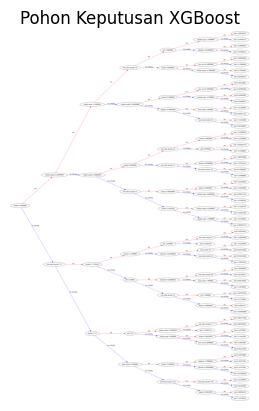

In [15]:
from xgboost import plot_tree

# Menampilkan struktur pohon pertama
plt.figure(figsize=(20, 20))
plot_tree(model, num_trees=0, rankdir='LR')
plt.title("Pohon Keputusan XGBoost")
plt.show()


Struktur Cabang: Pohon keputusan ini menunjukkan bagaimana model XGBoost membagi data berdasarkan fitur-fitur tertentu untuk memprediksi kualitas. Setiap node mewakili keputusan yang diambil berdasarkan nilai fitur.

Fitur yang Sering Muncul di Atas: Fitur yang muncul lebih awal di pohon biasanya memiliki dampak yang lebih besar dalam menentukan hasil. Misalnya, jika fitur seperti 'alcohol' sering muncul di bagian atas, itu menunjukkan pengaruh yang signifikan terhadap prediksi.

Cabang dan Pembagian: Jalur dari akar hingga simpul daun menunjukkan proses pengambilan keputusan yang dilakukan model. Setiap cabang menunjukkan pemisahan data berdasarkan kondisi tertentu dari fitur. Jika kondisi tersebut terpenuhi, data akan melanjutkan ke cabang kiri; jika tidak, ke cabang kanan.

Simpul Daun: Di ujung setiap cabang, simpul daun menyimpan nilai prediksi akhir. Nilai ini adalah hasil dari semua keputusan yang diambil sebelumnya dalam pohon.

Warna pada Cabang: Warna cabang (merah dan biru) dapat menunjukkan kategori atau kelas dari keputusan. Hal ini membantu dalam memahami bagaimana model mengklasifikasikan hasil berdasarkan fitur.

Kesimpulan:
Pohon keputusan ini memberikan wawasan yang jelas tentang bagaimana model membuat keputusan berdasarkan fitur dan bagaimana fitur-fitur ini berinteraksi satu sama lain. Ini juga menunjukkan kompleksitas dan detail dari model, serta memungkinkan analisis lebih dalam tentang pengaruh masing-masing fitur terhadap hasil prediksi.

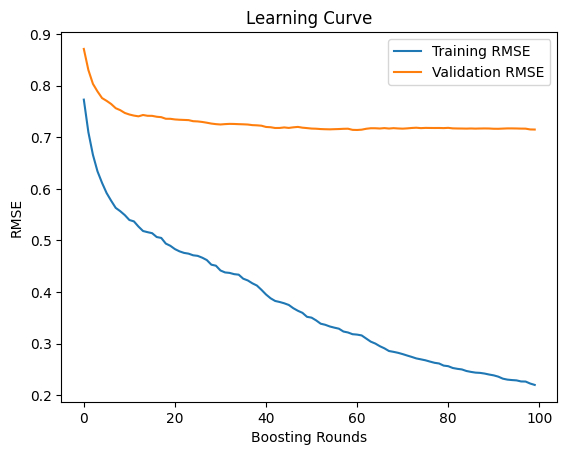

In [16]:
# Melatih model dengan eval_set untuk membuat learning curve
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], verbose=False)

# Mendapatkan hasil evaluasi untuk learning curve
results = model.evals_result()

# Menampilkan learning curve
plt.plot(results["validation_0"]["rmse"], label="Training RMSE")
plt.plot(results["validation_1"]["rmse"], label="Validation RMSE")
plt.xlabel("Boosting Rounds")
plt.ylabel("RMSE")
plt.title("Learning Curve")
plt.legend()
plt.show()


Performa Model pada Data Pelatihan: Garis biru yang menunjukkan Training RMSE menurun dengan cepat dan stabil, yang mengindikasikan bahwa model semakin baik dalam menyesuaikan data pelatihan seiring bertambahnya jumlah boosting rounds.

Performa Model pada Data Validasi: Garis oranye untuk Validation RMSE menunjukkan bahwa meskipun ada penurunan awal, nilai RMSE pada set validasi mulai stabil dan tidak menunjukkan banyak perubahan setelah beberapa iterasi.

Kesenjangan antara Training dan Validation RMSE:

Kesenjangan yang terlihat antara kedua garis ini menunjukkan bahwa model mungkin mengalami overfitting jika kesenjangan ini semakin besar. Dalam hal ini, Training RMSE berkurang, tetapi Validation RMSE cenderung stabil pada level yang lebih tinggi.
Namun, jika kesenjangan terlalu besar, itu dapat menjadi tanda bahwa model mungkin terlalu kompleks dan perlu disederhanakan.
Kesimpulan:
Grafik ini memberikan wawasan tentang seberapa baik model belajar seiring dengan bertambahnya data pelatihan. Model tampaknya belajar dengan baik pada data pelatihan, tetapi performa pada data validasi menunjukkan bahwa mungkin ada ruang untuk perbaikan, terutama dalam hal generalisasi.

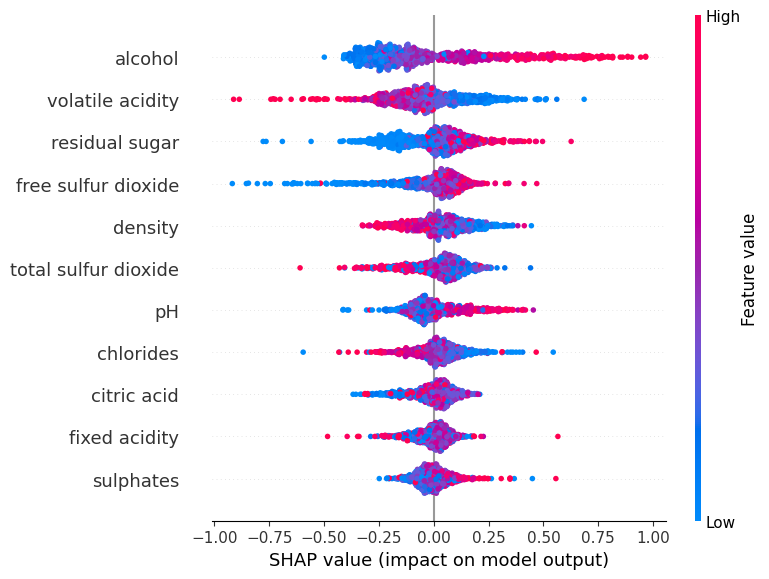

In [17]:
import shap

# Inisialisasi SHAP explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_val)

# Menampilkan plot SHAP values
shap.summary_plot(shap_values, X_val)


Fitur 'alcohol' menunjukkan pengaruh paling signifikan terhadap prediksi model. Titik-titik merah (nilai tinggi) pada sumbu horizontal menunjukkan bahwa peningkatan kadar alkohol cenderung menghasilkan prediksi kualitas yang lebih tinggi.

Fitur 'volatile acidity' memiliki pengaruh negatif, dengan titik-titik biru (nilai rendah) berkontribusi pada prediksi kualitas yang lebih rendah. Ini menunjukkan bahwa semakin tinggi nilai asam volatil, semakin buruk kualitas anggur menurut model.

Fitur lainnya seperti 'residual sugar', 'free sulfur dioxide', dan 'density' juga memiliki variasi pengaruh yang berbeda. Masing-masing menunjukkan bagaimana nilai mereka mempengaruhi output model, baik secara positif maupun negatif.

Dampak Negatif dari Beberapa Fitur: Beberapa fitur, seperti 'chlorides' dan 'citric acid', juga tampaknya memiliki dampak negatif terhadap prediksi, terutama ketika berada pada nilai tinggi.

Warna Titik: Warna pada grafik ini mengindikasikan nilai fitur—biru untuk nilai rendah dan merah untuk nilai tinggi. Hal ini memungkinkan kita untuk memahami hubungan antara nilai fitur dan dampaknya pada prediksi secara visual.

Kesimpulan:
Grafik ini memberikan pemahaman yang mendalam tentang bagaimana setiap fitur berkontribusi terhadap prediksi model, memungkinkan kita untuk mengidentifikasi fitur-fitur yang penting dan dampak positif atau negatif yang mereka miliki terhadap kualitas anggur. Ini juga dapat membantu dalam pengambilan keputusan dalam proses produksi anggur untuk meningkatkan kualitas.

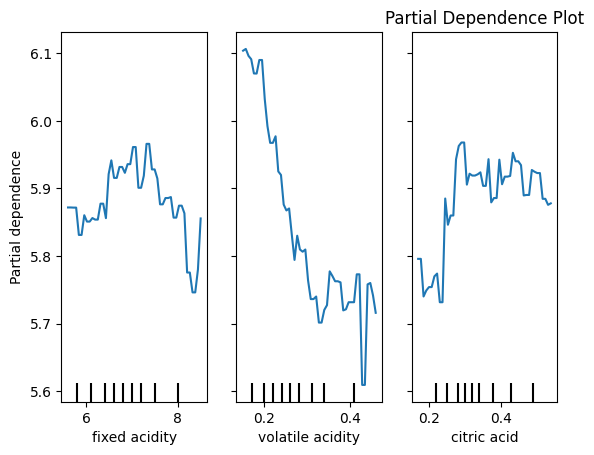

In [18]:
from sklearn.inspection import PartialDependenceDisplay

# Menampilkan Partial Dependence Plot untuk beberapa fitur
features_to_plot = [0, 1, 2]  # Indeks fitur yang ingin dipetakan
PartialDependenceDisplay.from_estimator(
    model,
    X_val,
    features=features_to_plot,
    grid_resolution=50  # Resolusi grid untuk plot
)
plt.title("Partial Dependence Plot")
plt.show()


Fitur 'fixed acidity':
Grafik menunjukkan bahwa saat nilai asam tetap (fixed acidity) meningkat dari sekitar 6 hingga 8, kualitas anggur cenderung stabil dan sedikit meningkat. Hal ini menunjukkan bahwa kadar asam tetap yang lebih tinggi tidak memiliki dampak signifikan terhadap kualitas anggur dalam rentang ini.
Fitur 'volatile acidity':
Grafik menunjukkan tren menurun. Saat asam volatil meningkat, ada penurunan yang jelas dalam kualitas, yang menunjukkan bahwa kadar asam volatil yang lebih tinggi cenderung merugikan kualitas anggur. Ini konsisten dengan pemahaman bahwa asam volatil yang tinggi dapat berkontribusi pada rasa yang tidak diinginkan.
Fitur 'citric acid':
Grafik menunjukkan fluktuasi yang lebih kecil, tetapi secara keseluruhan menunjukkan bahwa perubahan pada asam sitrat tidak memiliki dampak besar pada kualitas dalam rentang nilai yang ditampilkan. Hal ini dapat mengindikasikan bahwa asam sitrat mungkin tidak terlalu berpengaruh pada kualitas anggur dibandingkan dengan fitur lainnya.
Kesimpulan:
Grafik Partial Dependence ini memberikan wawasan tentang bagaimana perubahan nilai pada fitur tertentu dapat mempengaruhi prediksi kualitas anggur. Dengan memahami hubungan ini, pembuat anggur dapat mengambil keputusan yang lebih baik terkait pengaturan proses produksi untuk mencapai kualitas yang diinginkan.